https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/?__s=sedr9swwqoxuschybcvu

# [ I ] Optimal Threshold for ROC Curve

In [1]:
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification( n_samples = 10000 , 
                            n_features = 2 ,
                            n_redundant = 0 ,
                            n_clusters_per_class = 1 ,
                            weights = [ 0.99 ] , 
                            flip_y = 0 ,
                            random_state = 4 )

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
trainX, testX, trainy, testy = train_test_split( X , y , test_size = 0.5 , random_state = 2 , stratify = y )

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
model = LogisticRegression( solver = 'lbfgs' )

model.fit( trainX , trainy )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
yhat = model.predict_proba( testX )

In [10]:
yhat = yhat[ : , 1 ]

In [11]:
from sklearn.metrics import roc_curve

In [12]:
fpr , tpr , thresholds = roc_curve( testy , yhat )

In [16]:
from matplotlib import pyplot

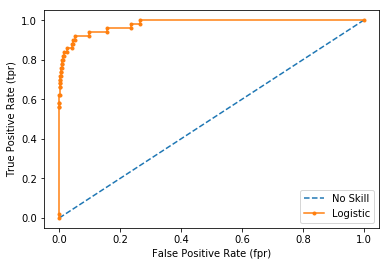

In [18]:
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot( fpr , tpr , marker = '.' , label = 'Logistic' )
# axis labels
pyplot.xlabel('False Positive Rate (fpr)')
pyplot.ylabel('True Positive Rate (tpr)')
pyplot.legend()
# show the plot
pyplot.show()

## Threshold with the optimal balance between false positive and true positive rates

https://en.wikipedia.org/wiki/Youden%27s_J_statistic

In [20]:
from numpy import argmax

In [23]:
J = tpr - fpr

ix = argmax( J )

print( ix )

best_thresh = thresholds[ ix ]

print( best_thresh )

34
0.016152851152469214


# [ II ] Optimal Threshold Tuning

In [24]:
from sklearn.metrics import f1_score

In [25]:
yhat = model.predict( testX )

In [26]:
score = f1_score( testy , yhat )

print( score )

0.7012987012987013


In [27]:
yhat = model.predict_proba(testX)

In [28]:
yhat = yhat[ : , 1 ]

In [30]:
from numpy import arange

In [31]:
thresholds = arange(0, 1, 0.001)

In [32]:
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return ( pos_probs >= threshold ).astype( 'int' )

In [33]:
scores = [ f1_score( testy , to_labels( yhat , t ) ) for t in thresholds ]

In [35]:
ix = argmax( scores )

print( thresholds[ ix ] )

print( scores[ ix ] )

0.251
0.7555555555555556
